<h3><bold>Importação e instalação das bibliotecas que são utilizadas, matplotlib pra plotar os gráficos, skfuzzy para utilizar funções de defuzzyficação, numpy para utilizar arrays e math pra utilizar funções matemáticas.

In [1]:
!pip3 install scikit-fuzzy
%matplotlib inline
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
import numpy as np
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 14.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d7c79fa2b49474929d5d93de28fd2814cf4bbf3f70480563f18db358925fddc5
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


<h3><bold>As funções que foram utilizadas para criar as funções trinagulares, trapezoidais e gaussianas, funções de complementos, união e interseção.

In [2]:
def triangular(x,a,m,b):
  y=maximo((minimo(((x-a)/(m-a),(b-x)/(b-m))),0))
  return y
def trapezoidal(x,a,m,n,b):
  y=maximo((minimo(((x-a)/(m-a),1,(b-x)/(b-n))),0))
  return y
def gaussiana(x,k,m):
  y=math.e**(-k*(x-m)**2)
  return y
def zadeh(a):
  y = 1-a
  return y
def sugeno(a,s):
  y = (1-a)/(1+s*a)
  return y
def yager(a,w):
  y = (1-a**w)**(1/w)
  return y
def maximo(x):
  maior=0
  for i in x:
    if i > maior:
      maior = i
  return maior
def somaProbabilistica(a,b):
  y = a+b-a*b
  return y
def somaLimitada(a,b):
  y = minimo((1,a+b))
  return y
def somaDrastica(a,b):
  y = 1
  if(b==0):
    y=a
  elif(a==0):
    y=b
  return y
def minimo(x):
  menor=x[0]
  for i in x:
    if i < menor:
      menor = i
  return menor
def produto(a,b):
  y = a*b
  return y
def produtoLimitado(a,b):
  y=maximo((0,a+b-1))
  return y
def produtoDrastico(a,b):
  y=0
  if(b==1):
    y=a
  elif(a==1):
    y=b
  return y


<h3><bold> Os intervalos das funções foram de -10 a 10.

In [3]:
lista = []
for i in range(0,100):
  lista.append((i-50)/5)

<h3><bold>Estas são 3 funções antecedentes criadas para o método de Mamdani. Foram utilizadas as funções trapezoidais, de valores:

*   [-20, -15, -6, -3]
*   [-6, -3, 3, 6]
*   [3, 6, 15, 20]



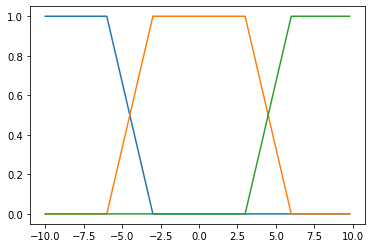

In [4]:
ante1 = list()
ante2 = list()
ante3 = list()
for i in lista:
  ante1.append(trapezoidal(i,-20,-15,-6,-3))
  ante2.append(trapezoidal(i,-6,-3,3,6))
  ante3.append(trapezoidal(i, 3,6,15,20))
plt.plot(lista,ante1)
plt.plot(lista,ante2)
plt.plot(lista,ante3)
plt.show()

<h3><bold>Estas são 3 funções consequentes criadas para o método de Mamdani.Foram utilizadas as funções trapezoidais, de valores:

*   [-2.46, -1.46, 1.46, 2.46]
*   [1.46, 2.46, 5, 7]
*   [5, 7, 13, 15]


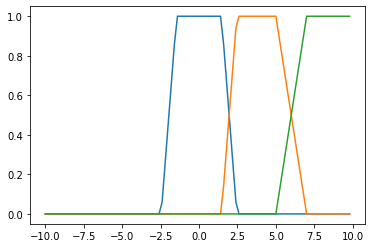

In [5]:
conse1 = list()
conse2 = list()
conse3 = list()
for i in lista:
  conse1.append(trapezoidal(i,-2.46,-1.46,1.46,2.46))
  conse2.append(trapezoidal(i,1.46,2.46,5,7))
  conse3.append(trapezoidal(i,5,7,13,15))
plt.plot(lista,conse1)
plt.plot(lista,conse2)
plt.plot(lista,conse3)
plt.show()

<bold><h3>As Regras de ativações que foram utilizadas são: <br>
*   Se Ante1 é A1 então z é Conse3
*   Se Ante2 é A2 então z é Conse2
*   Se Ante3 é A3 então z é Conse1<br>
<bold><h3>Então para cada ponto do x foi feito o calculo da regra, achando o grafico resultante da função. Foi utilizado o método de fuzzyficação de Mamdani, que utiliza o minimo para a geração das funções resultantes, e máximo para a união das resultantes.

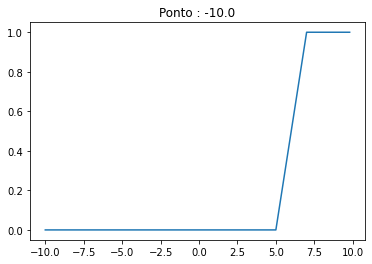

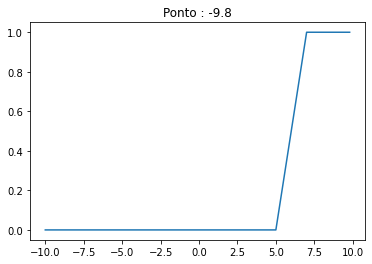

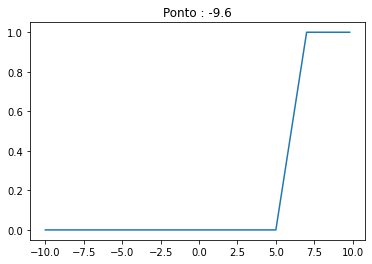

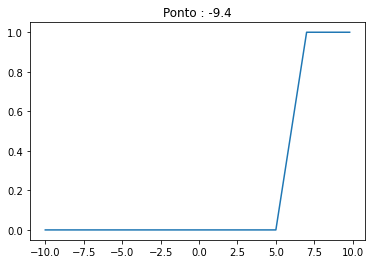

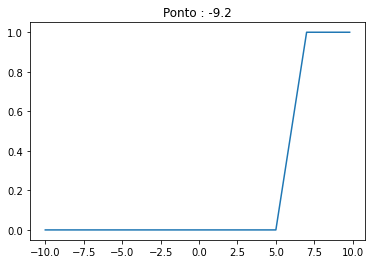

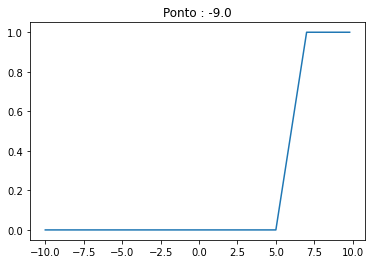

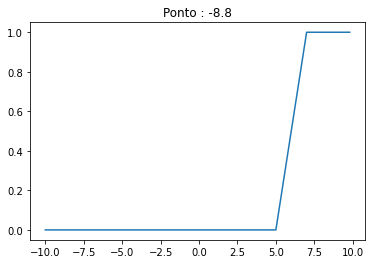

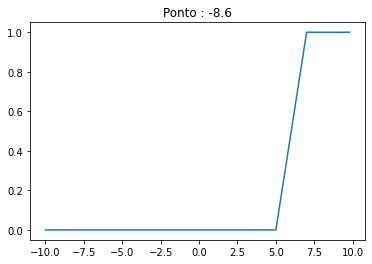

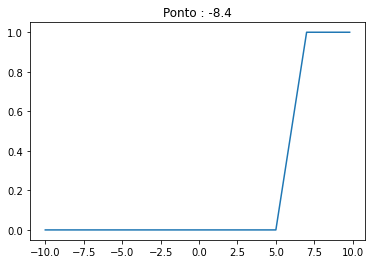

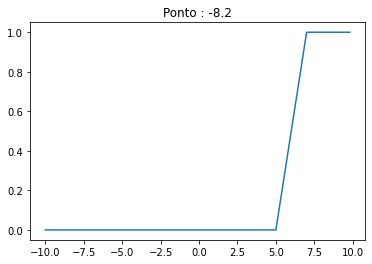

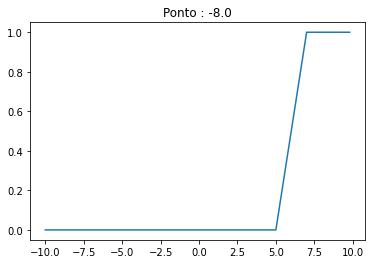

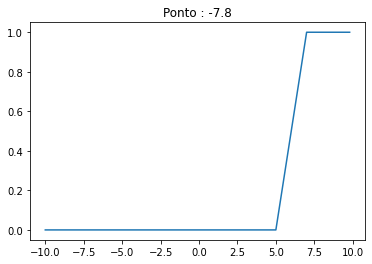

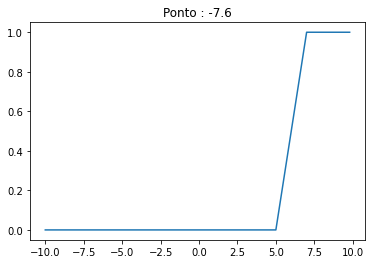

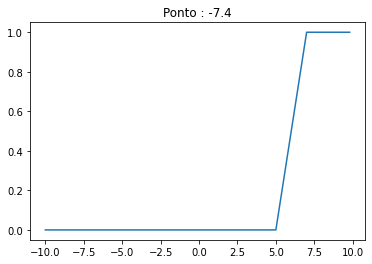

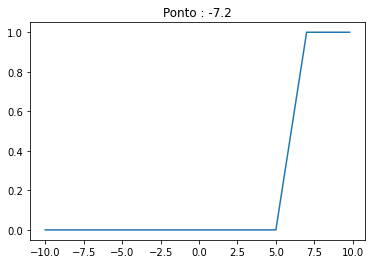

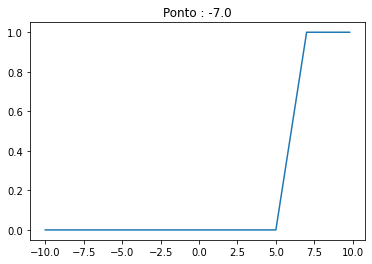

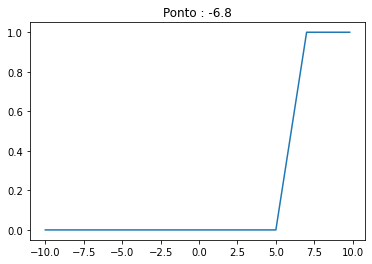

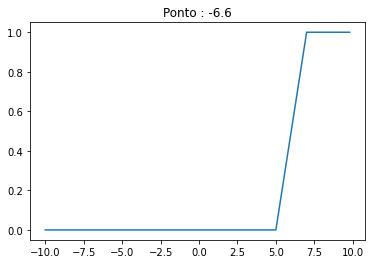

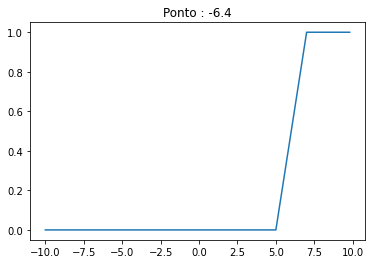

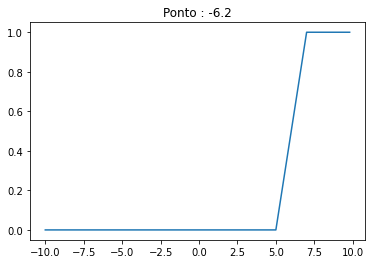

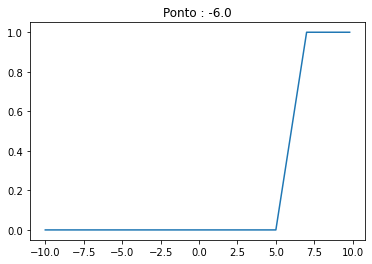

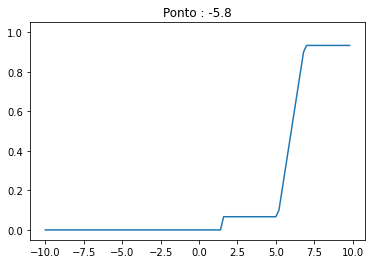

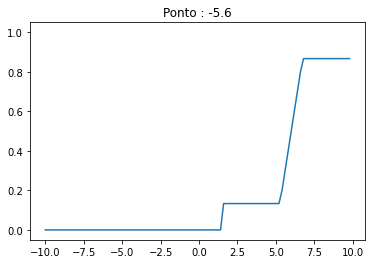

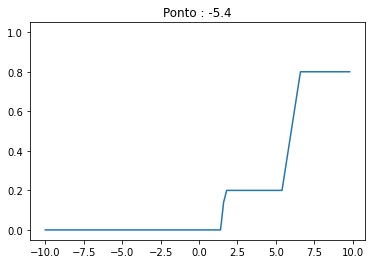

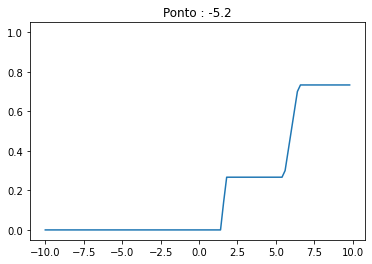

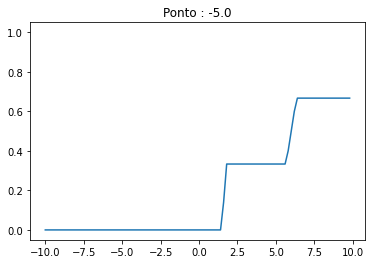

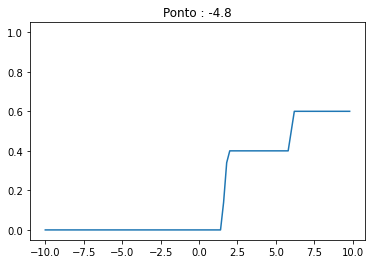

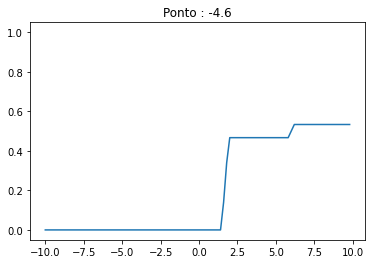

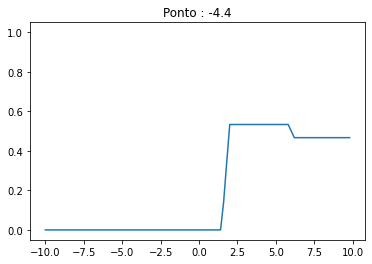

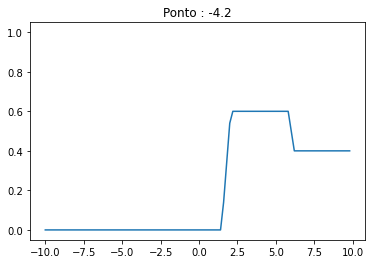

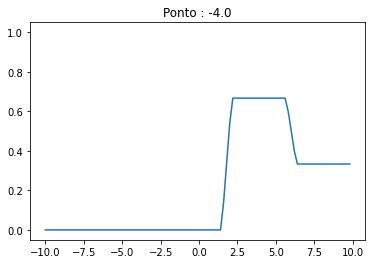

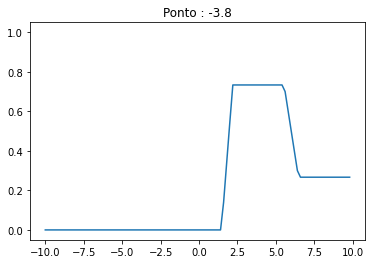

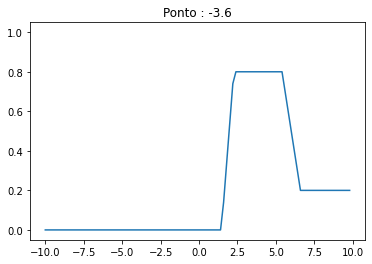

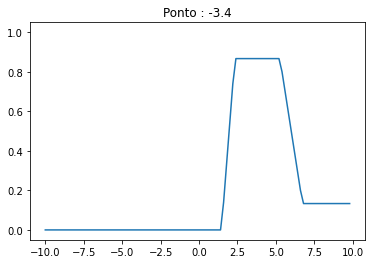

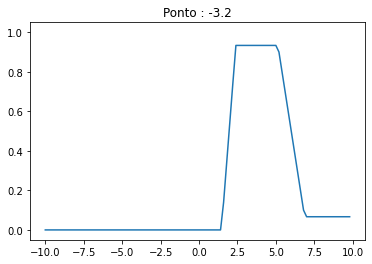

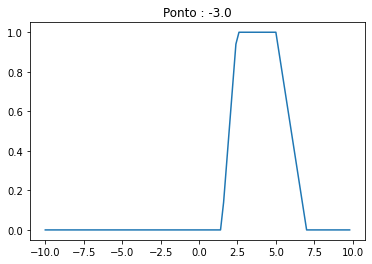

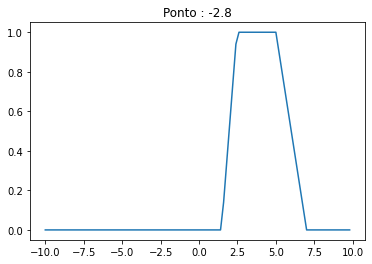

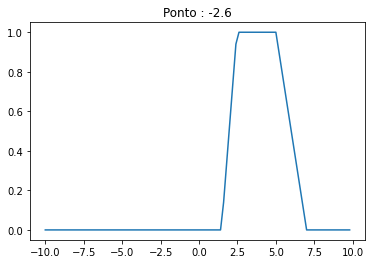

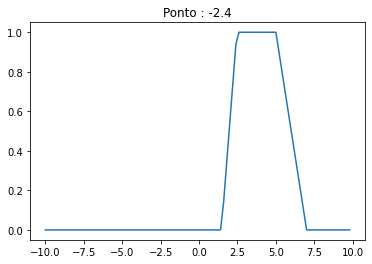

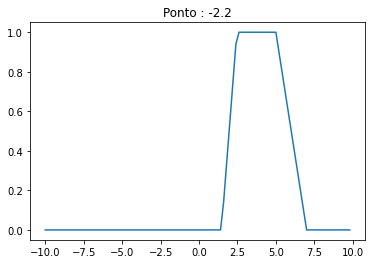

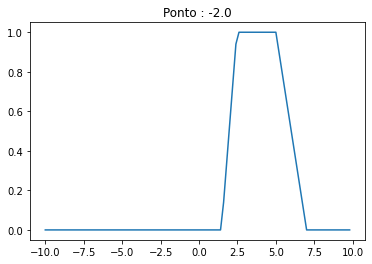

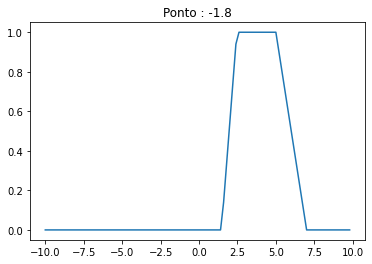

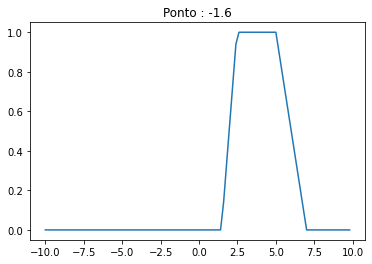

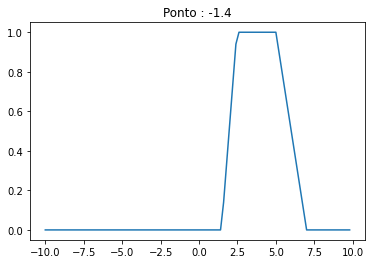

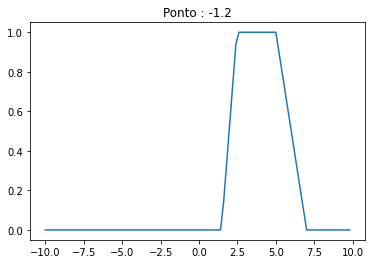

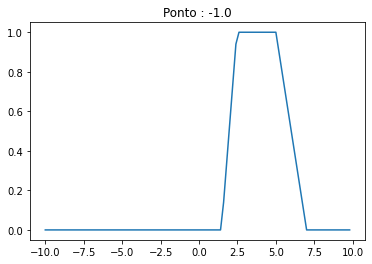

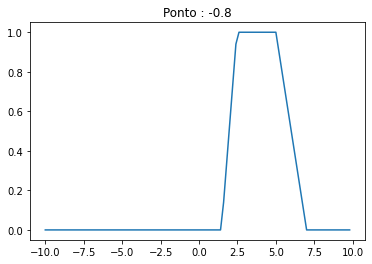

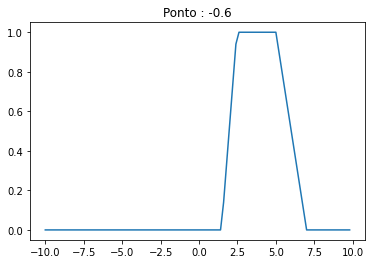

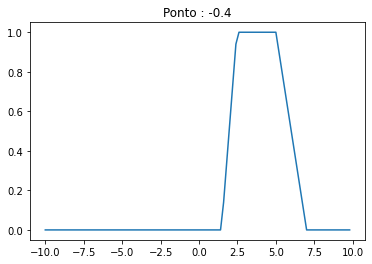

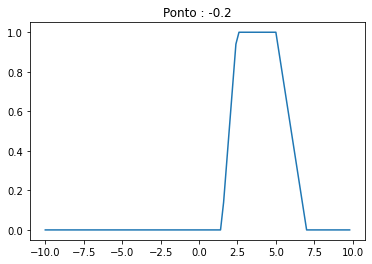

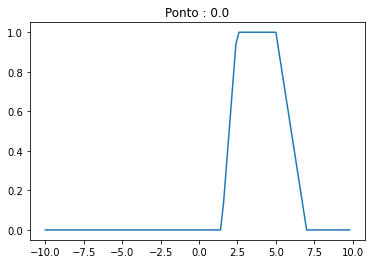

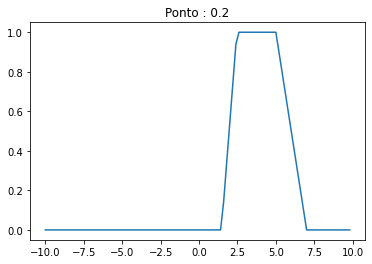

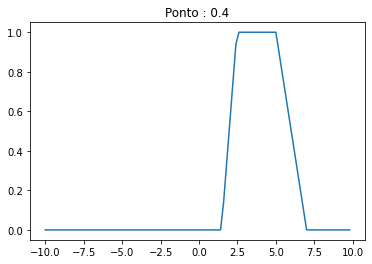

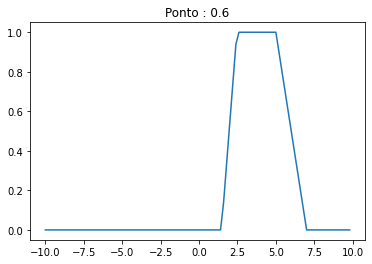

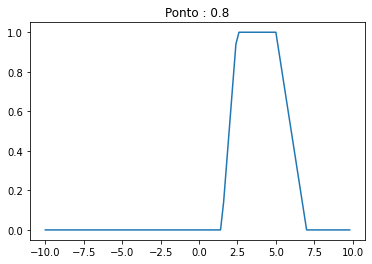

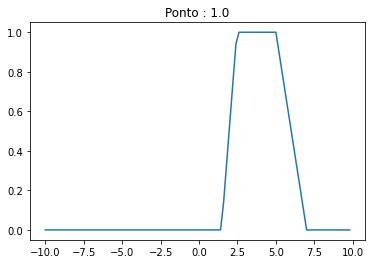

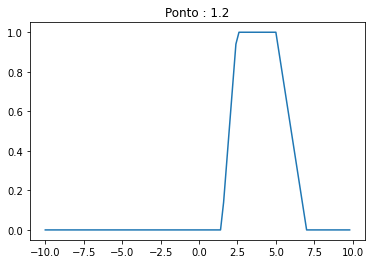

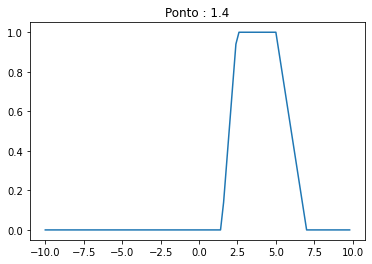

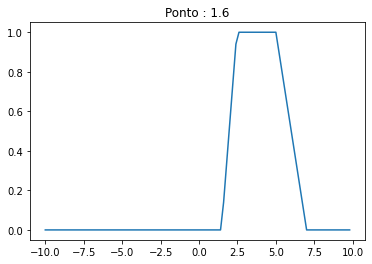

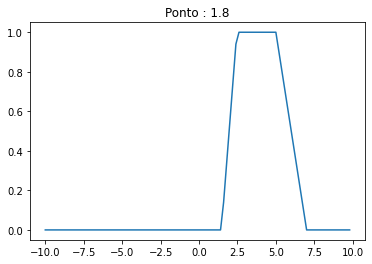

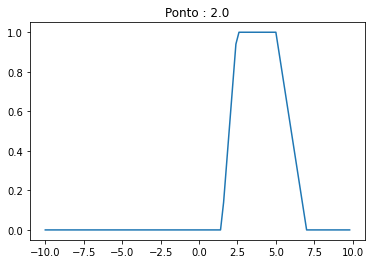

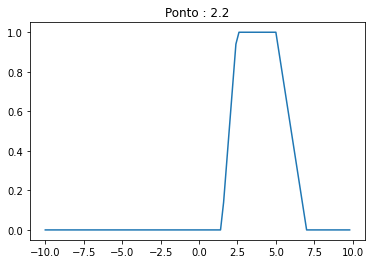

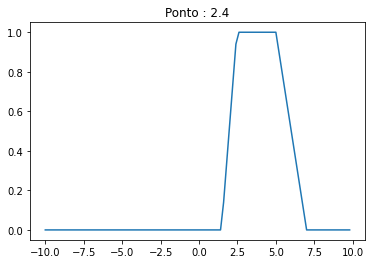

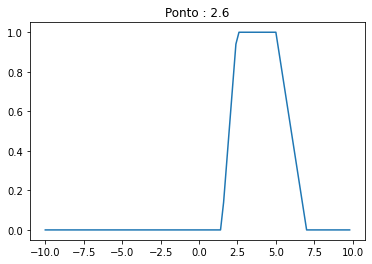

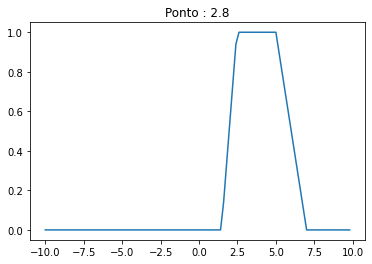

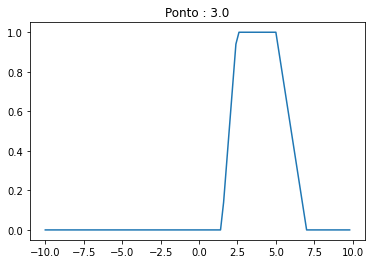

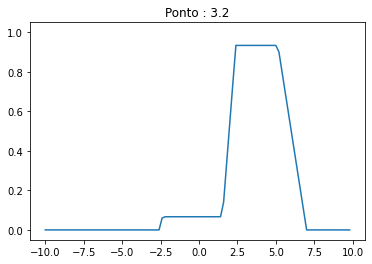

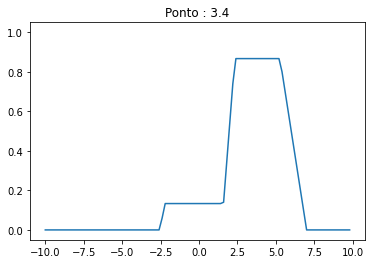

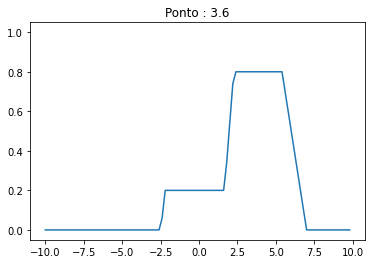

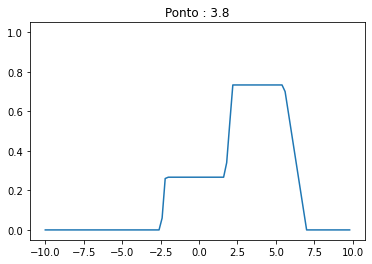

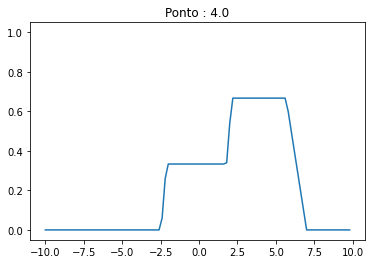

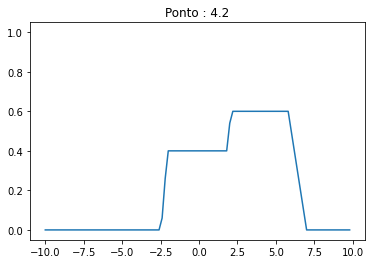

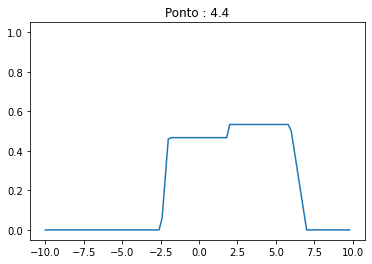

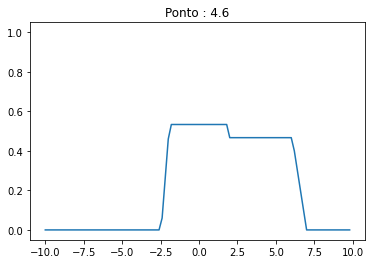

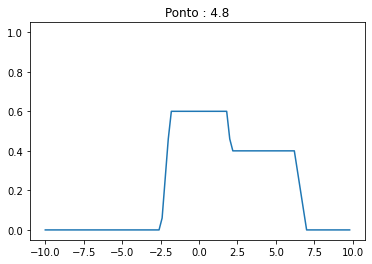

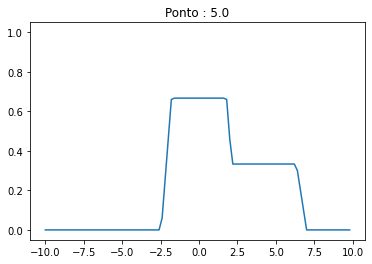

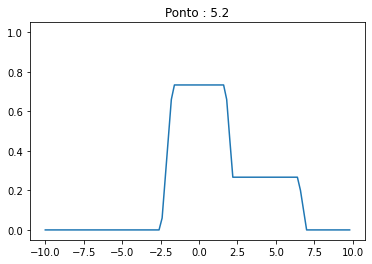

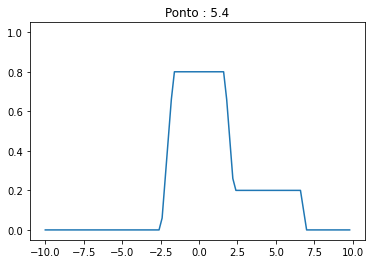

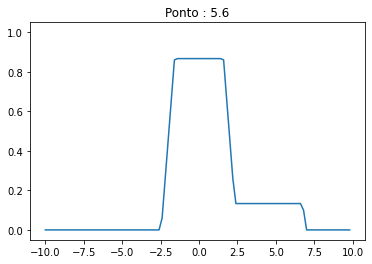

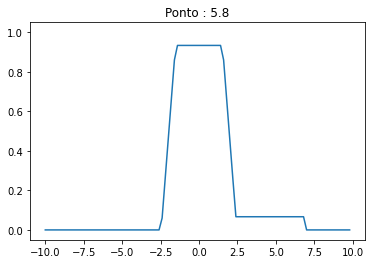

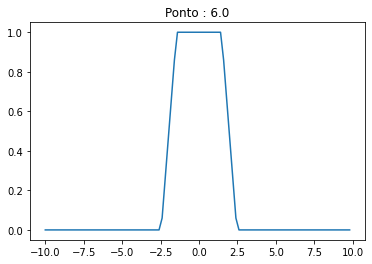

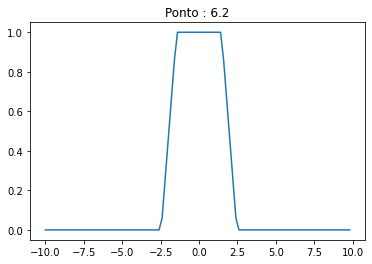

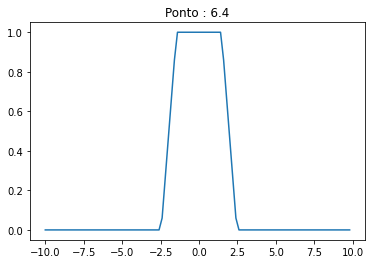

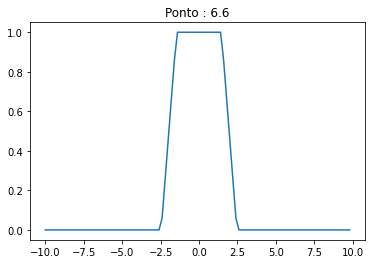

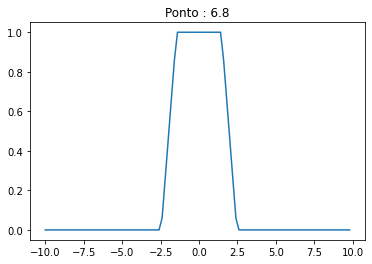

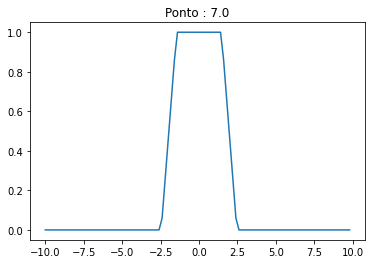

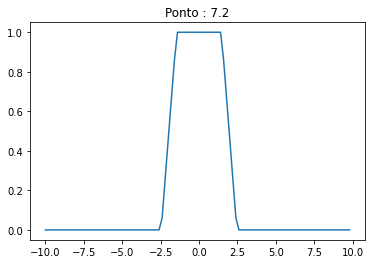

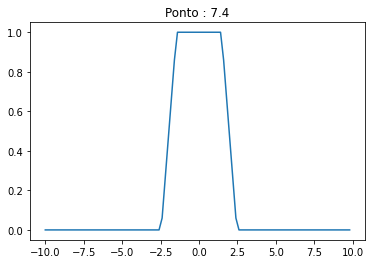

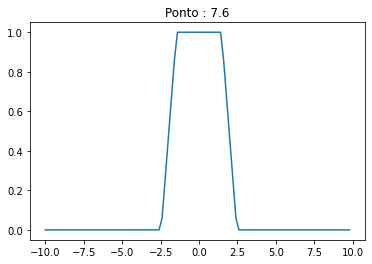

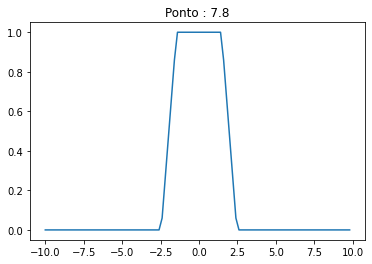

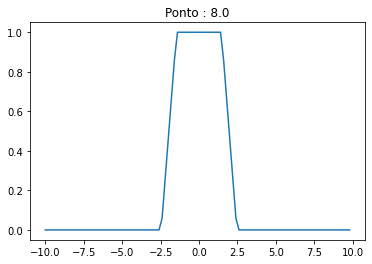

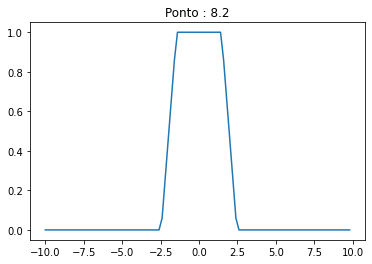

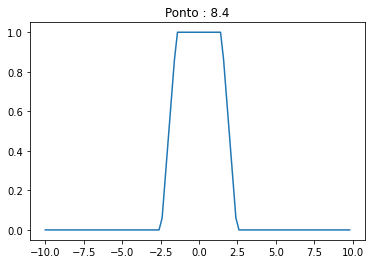

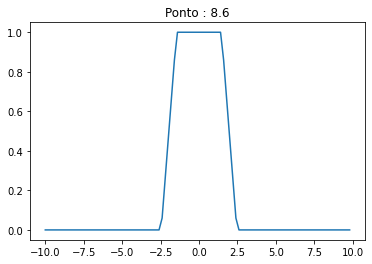

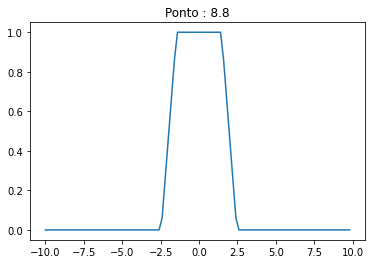

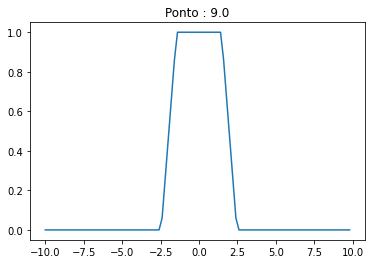

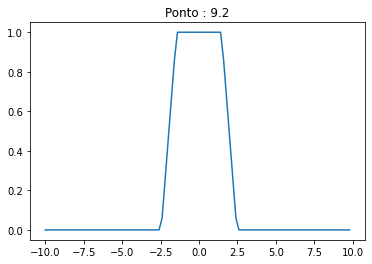

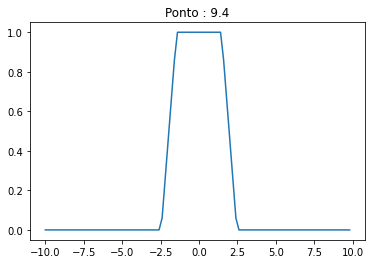

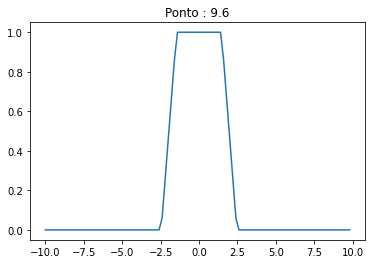

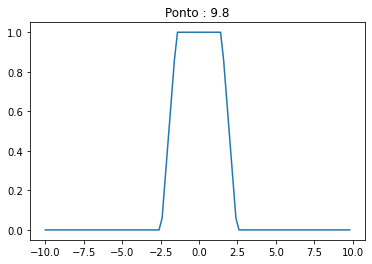

In [6]:
#Regras:
#Se Ante1 é A1 e Ante3 é B1 então z é C2
#Se Ante2 é A1 e Ante1 é B2 então z é C3
#Se Ante2 é A1 e Ante3 é B3 então z é C1
defuzzy = list()
for i in range(0,len(lista)):
  final = list()
  result1 = list()
  result2 = list()
  result3 = list()
  a1 = ante1[i]
  a2 = ante2[i]
  a3 = ante3[i]
  for j in range(0,len(lista)):
    result1.append(minimo((conse3[j],a1)))
    result2.append(minimo((conse2[j],a2)))
    result3.append(minimo((conse1[j],a3)))
    final.append(maximo((result1[j],result2[j],result3[j])))
  plt.plot([0,1],[0,1], color="white")
  plt.plot(lista,final)
  plt.title("Ponto : "+str(lista[i]))
  defuzzy.append(fuzzy.defuzz(np.array(lista),np.array(final),'lom'))
  plt.show()

<bold> <h3> Foi efetuado a defuzzyficação usando o máximo dos máximos, de cada ponto, de cada função resultante, então, em cada ponto foi achado um valor e criado outra função, de todos os valores defuzzyficados, resultando no seguinte gráfico.

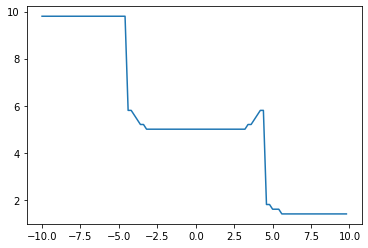

In [7]:
plt.plot(lista,defuzzy)
plt.show()